# Iris data set

Buscaremos ilustrar los distintos algoritmos con datos reales. Un conjunto de datos interesante y versatil es el Iris Dataset, que puede utilizarse para clustering, regresión y clasificación.

Fue utilizado por Ronald Fisher en su artículo "The use of multiple measurements in taxonomic problems" (1936).

El conjunto de datos consiste en 50 muestras de 3 especies de Iris (Iris setosa, Iris virginica y Iris versicolor). Para cada flor, se midieron 4 características: largo y ancho de los petalos, y largo y ancho de los sépalos, en centímetros.

![title](im1.png)


### Iris Dataset: Exploración de los datos


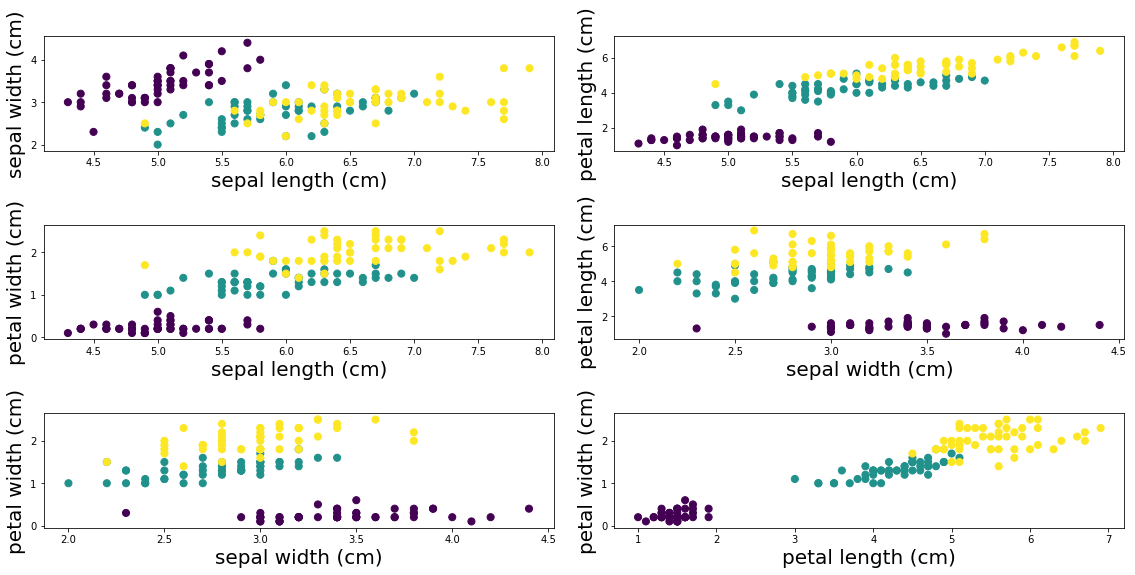

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
iris = datasets.load_iris()

def plot(dataset, ax, i, j):
    ax.scatter(dataset.data[:,i], dataset.data[:,j], c=dataset.target, s=50)
    ax.set_xlabel(dataset.feature_names[i], fontsize=20)
    ax.set_ylabel(dataset.feature_names[j], fontsize=20)

f, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2, figsize=(16,8))
plot(iris, ax1, 0, 1)
plot(iris, ax2, 0, 2)
plot(iris, ax3, 0, 3)
plot(iris, ax4, 1, 2)
plot(iris, ax5, 1, 3)
plot(iris, ax6, 2, 3)
f.tight_layout()
plt.show()


# Clustering
Pregunta Crucial:

¿Si no supiéramos que existen 3 tipos de Iris, seríamos capaces algorítmicamente de encontrar 3 tipos de flores?

# Clustering

* Se tienen datos sin etiquetar/agrupar.
* Se busca obtener un agrupamiento "natural" de los datos.
* No existen ejemplos de los cuales aprender: método sin supervisar.
* Fácil de verificar por inspección visual en 2D y 3D.
* Difícil de verificar en dimensiones superiores.

# Ejemplos de problas de Clustering

* **Segmentacion de mercado**: ¿Cómo atendemos mejor a nuestros clientes?

* ** Ubicación de centros de reabastacimiento:** ¿Cómo minimizamos tiempos de entrega?

* ** Compresión de imágenes: ** ¿Cómo minimizamos el espacio destinado al almacenamiento?

# Ubicación de los centros de reabastecimiento
![title](im2.png)

# Ubicación de los centros de reabastecimiento

![title](im3.png)

# Compresión de imágenes

utilizando todos los colores:
![title](im4.png)

# Compresión de imágenes

utilizando 32 colores:

![title](im5.png)

# Carácteristicas de un problema de Clustering
* **datos de entrada: ** Conjunto de inputs sin etiquetas.

* **datos de salida: ** Etiquetas para cada input.

# Algoritmos de Clustering
Buscan utilizar las propiedades inherentes presentes en los datos para organizarlos en grupos de máxima similitud.

* **Algoritmos basados en conectividad**: Hierarchical Clustering.
* **Algoritmos basados en densidad:** Expectation Maximization
* **Algoritmos basados en centroides:** k-means.
# k-means

Input: set $X$ de $N$ datos $x=(x_1, ..., x_n)$ y un meta-parámetro $k$ con el número de clusters a crear.

Output: Set de $k$ centroides de clusters ($\mu_l$) y una etiquetación de cada dato $x$ en $X$ indicando a qué cluster pertenece.

$x_i$ y $\mu_l$ son vectores en $\mathcal{R}^m$.

La pertenencia es única. Todos los puntos dentro de un cluster se encuentran mas cercanos en distancia al centroide de su cluster que al centroide de otro cluster.

Matemáticamente: 
$$\begin{align} 
\textrm{Minimizar } \sum_{l=1}^k \sum{x_n \in C_l} ||x_n - \mu_l ||^2 \textrm{ respecto a } C_l, \mu_l. 
\end{align}$$ Donde $C_l$ es el cluster l-ésimo.

# ¿Cuándo funciona k-means?

Cuando los clusters son bien definidos y pueden separarse por círculos (n-esferas) de igual tamaño.

![title](im6.png)
![title](im7.png)
![title](im8.png)

¿Cuándo falla k-means?
* Cuando se selecciona mal el número $k$ de clusters.
* Cuando no existe separación clara entre los clusters.
* Cuando los clusters son de tamaños muy distintos.


In [11]:
from sklearn.datasets.samples_generator import make_blobs

def init_blobs(N, k, seed=42):
    X, y = make_blobs(n_samples=N, centers=k,
                      random_state=seed, cluster_std=0.60)
    return X 

import numpy as np
from scipy.linalg import norm

from pdb import set_trace as st

def find_centers(X, k, seed=None):
    if not seed:
      seed = np.random.randint(10000000)
    np.random.seed(seed)
    # Initialize to K random centers
    old_centroids = random_centers(X, k)
    new_centroids = random_centers(X, k)
    while not has_converged(new_centroids, old_centroids):
        old_centroids = new_centroids
        # Assign all points in X to clusters
        clusters = cluster_points(X, old_centroids)
        # Reevaluate centers
        new_centroids = reevaluate_centers(X, clusters, k)
    return (new_centroids, clusters)

def random_centers(X, k):
    index = np.random.randint(0, X.shape[0], k)
    return X[index, :]

def has_converged(new_mu, old_mu, tol=1E-6):
    num = norm(np.array(new_mu)-np.array(old_mu))
    den = norm(new_mu)
    rel_error= num/den
    return rel_error < tol

def cluster_points(X, centroids):
    clusters = []
    for i, x in enumerate(X):
        distances = np.array([norm(x-cj) for cj in centroids])
        clusters.append( distances.argmin())
    return np.array(clusters)

def reevaluate_centers(X, clusters, k):
    centroids = []
    for j in range(k):
        cj = X[clusters==j,:].mean(axis=0)
        centroids.append(cj)
    return centroids

from matplotlib import pyplot as plt
import numpy as np
from pdb import set_trace as st

colors = ["r", "b", "g", "c", "k", "y", "m"]

def resize(X):
    Xmin = X[:].min()
    Xmax = X[:].max()
    dX = .1*(Xmax-Xmin)
    plt.xlim([Xmin-dX, Xmax+dX])
    plt.ylim([Xmin-dX, Xmax+dX])
    return

def data(X):
    plt.figure(figsize=(12,6))
    plt.plot(X[:,0], X[:,1],'ko')
    resize(X)
    plt.show()
    return

def clusters(X, centroids, clusters):
    plt.figure(figsize=(12,6))
    for j in range(len(centroids)):
        c = colors[j%len(colors)]
        mu = centroids[j]
        C = X[clusters==j]
        plt.plot(C[:,0], C[:,1], c+'o')
        plt.plot(mu[0], mu[1], 'w*', ms=16, mew=2.0)
    resize(X)
    plt.show()
    return

from matplotlib import pyplot as plt
import numpy as np
from pdb import set_trace as st

colors = ["r", "b", "g", "c", "k", "y", "m"]

def resize(X):
    Xmin = X[:].min()
    Xmax = X[:].max()
    dX = .1*(Xmax-Xmin)
    plt.xlim([Xmin-dX, Xmax+dX])
    plt.ylim([Xmin-dX, Xmax+dX])
    return

def data(X):
    plt.figure(figsize=(12,6))
    plt.plot(X[:,0], X[:,1],'ko')
    resize(X)
    plt.show()
    return

def clustersa(X, centroids, clusters):
    plt.figure(figsize=(12,6))
    for j in range(len(centroids)):
        c = colors[j%len(colors)]
        mu = centroids[j]
        C = X[clusters==j]
        plt.plot(C[:,0], C[:,1], c+'o')
        plt.plot(mu[0], mu[1], 'w*', ms=16, mew=2.0)
    resize(X)
    plt.show()
    return


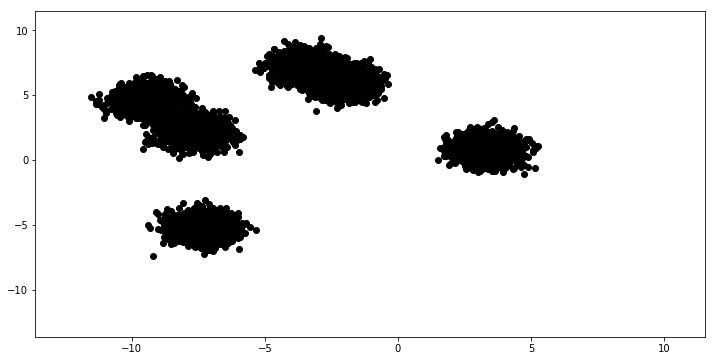

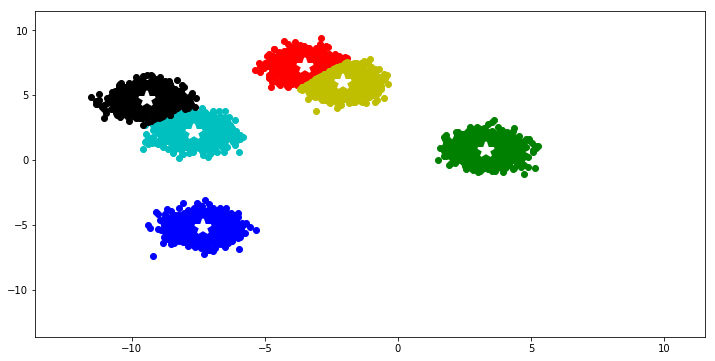

In [13]:
#### EJEMPLO VISUAL ###
from sklearn.cluster import KMeans
X = init_blobs(10000, 6, seed=43)
data(X)

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
centroids =kmeans.cluster_centers_
clusters = kmeans.labels_
clustersa(X, centroids, clusters)



In [20]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

n_clusters = 3

iris = datasets.load_iris()
X = iris.data
y_true = iris.target
kmeans = KMeans(n_clusters)
kmeans.fit(X)
y_pred = kmeans.labels_
cm = confusion_matrix(y_true, y_pred)
print (cm)
print ((cm.sum() - np.diag(cm).sum() ) / float(cm.sum())) # 16/100

[[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]
0.9066666666666666
